In [1]:
# Import biblioteka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

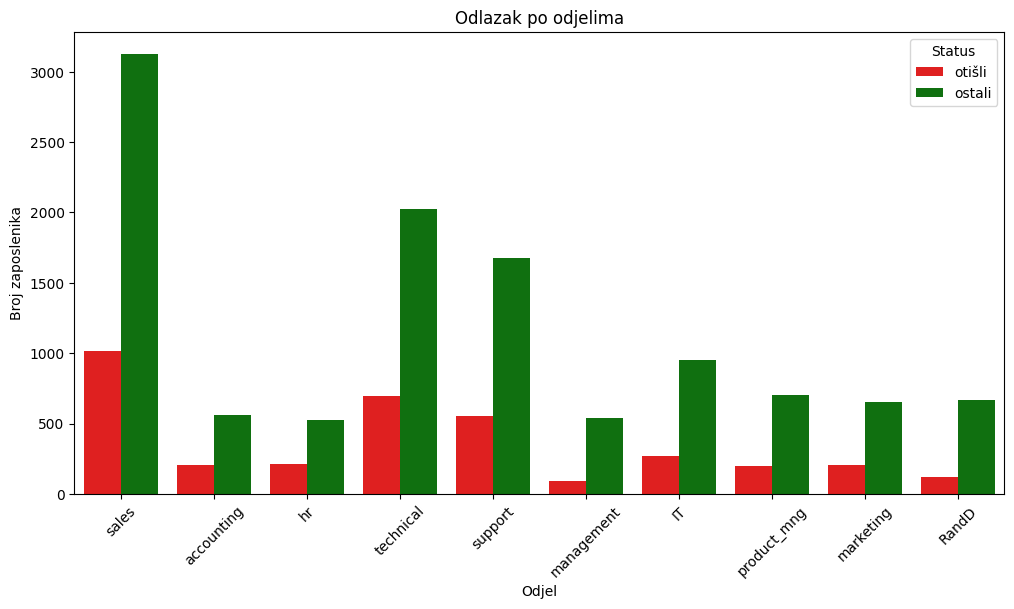

In [2]:
# 1. Učitavanje i analiza podataka
df = pd.read_csv("HR_comma_sep.csv")

# Dodavanje kolone za status
df['left_status'] = df['left'].map({0: 'ostali', 1: 'otišli'})
custom_palette = {'ostali': 'green', 'otišli': 'red'}

# Prikaz broja odlazaka po odjelima
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='left_status', palette=custom_palette)
plt.title("Odlazak po odjelima")
plt.xticks(rotation=45)
plt.xlabel("Odjel")
plt.ylabel("Broj zaposlenika")
plt.legend(title='Status')
plt.show()

In [4]:
# 2. Priprema podataka
data = df.copy()
label_enc = LabelEncoder()
data['Department'] = label_enc.fit_transform(data['Department'])
data['salary'] = label_enc.fit_transform(data['salary'])

X = data.drop(['left', 'left_status'], axis=1)
y = data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# 3. Definisanje i treniranje modela
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

print("\n=== Evaluacija modela ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} - Preciznost: {acc:.4f}")
    print(classification_report(y_test, y_pred))


=== Evaluacija modela ===

Random Forest - Preciznost: 0.9876
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500


Logistic Regression - Preciznost: 0.7604
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500


Decision Tree - Preciznost: 0.9736
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.93      0.96      0.95      1072

    accuracy                           0.

C:\Users\User\AppData\Local\Temp\ipykernel_17716\1341478332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


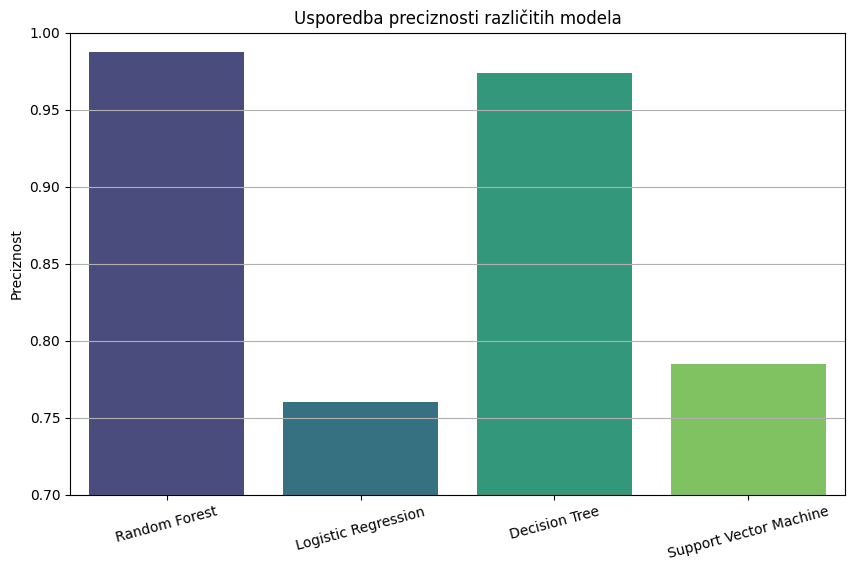

In [6]:
# 4. Grafički prikaz preciznosti svih modela
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Usporedba preciznosti različitih modela")
plt.ylabel("Preciznost")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


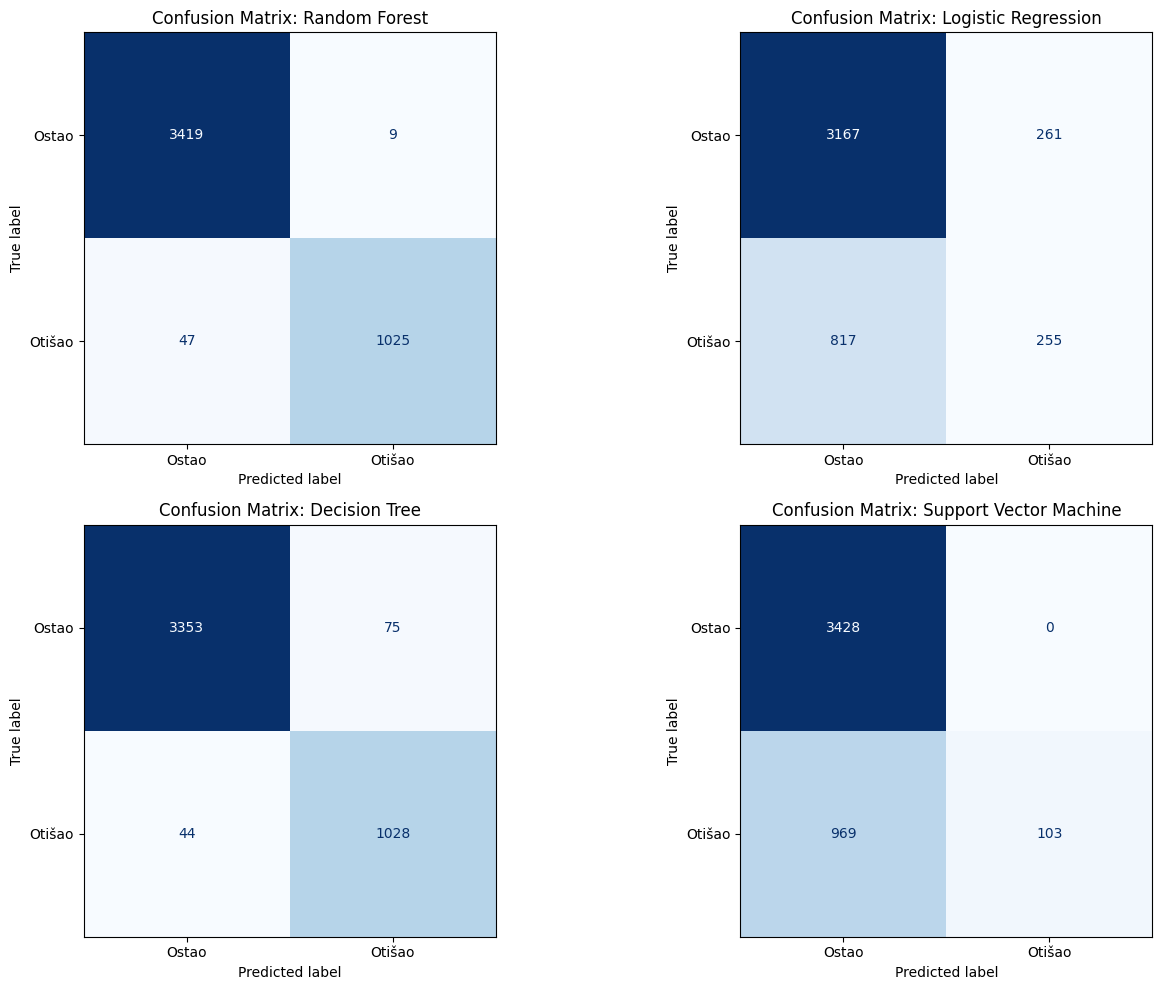

In [7]:
# 5. Konfuzione matrice za sve modele
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ostao", "Otišao"])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()


In [11]:
# 6. Predikcija 
print("\n=== Predikcija ===")

# Unos podataka
satisfaction_level = float(input("Zadovoljstvo (0.0 - 1.0): "))
last_evaluation = float(input("Zadnja evaluacija (0.0 - 1.0): "))
number_project = int(input("Broj projekata: "))
average_monthly_hours = int(input("Prosječan broj sati mjesečno: "))
time_spend_company = int(input("Godine provedene u firmi: "))
work_accident = int(input("Radna nesreća (0 = ne, 1 = da): "))
promotion_last_5years = int(input("Promocija u zadnjih 5 godina (0 = ne, 1 = da): "))
department = input("Odjel (npr. sales, technical, support...): ")
salary = input("Plata (low, medium, high): ")

# Enkodiranje ulaza
try:
    department_encoded = label_enc.transform([department])[0]
except ValueError:
    department_encoded = 0  # podrazumijevana vrijednost ako unos nije prepoznat

try:
    salary_encoded = label_enc.transform([salary])[0]
except ValueError:
    salary_encoded = 0

# Kreiranje DataFrame-a
new_employee = pd.DataFrame([[
    satisfaction_level, last_evaluation, number_project,
    average_monthly_hours, time_spend_company,
    work_accident, promotion_last_5years,
    department_encoded, salary_encoded
]], columns=X.columns)

# Predikcija
chosen_model = models["Random Forest"]
prediction = chosen_model.predict(new_employee)[0]
status = "Otići će iz firme" if prediction == 1 else "Ostat će u firmi"
print(f"\n>>> Predikcija: {status}")


=== Predikcija ===


Zadovoljstvo (0.0 - 1.0):  0.3
Zadnja evaluacija (0.0 - 1.0):  0.2
Broj projekata:  9
Prosječan broj sati mjesečno:  300
Godine provedene u firmi:  7
Radna nesreća (0 = ne, 1 = da):  0
Promocija u zadnjih 5 godina (0 = ne, 1 = da):  0
Odjel (npr. sales, technical, support...):  support
Plata (low, medium, high):  medium



>>> Predikcija: Otići će iz firme
